In this notebook, we will visualize the publishing frequency of SZ articles before and after pre-processing, highlighting the impact of the pre-processing steps on the dataset.

In [1]:
import os
import pandas as pd
from ast import literal_eval

# Set the path variable to point to the 'newspaper_data_processing' directory, which is located in the same 
# parent directory as 'newspaper_analysis'. This is the repository used for data pre-processing.
path = os.getcwd().replace('\\newspaper_analysis\\data', '') + '\\newspaper_data_processing'

# Load pre-processed 'SZ' dataset from a CSV file.
sz = pd.read_csv(path + '\\SZ\\' + 'sz_prepro_final.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'newspaper': 'str',
                                                                                                 'newspaper_2': 'str',
                                                                                                 'quelle_texts': 'str',
                                                                                                 'page': 'str',
                                                                                                 'rubrics': 'str'})
sz.page = sz.page.fillna('')
sz.newspaper = sz.newspaper.fillna('')
sz.newspaper_2 = sz.newspaper_2.fillna('')
sz.rubrics = sz.rubrics.fillna('')
sz.quelle_texts = sz.quelle_texts.fillna('')

# Load the raw 'SZ' dataset, excluding regional news, from a CSV file.
sz_raw = pd.read_csv(path + '\\SZ\\' + 'sz_raw.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'newspaper': 'str',
                                                                                                 'newspaper_2': 'str',
                                                                                                 'quelle_texts': 'str',
                                                                                                 'page': 'str',
                                                                                                 'rubrics': 'str'})
sz_raw.page = sz_raw.page.fillna('')
sz_raw.newspaper = sz_raw.newspaper.fillna('')
sz_raw.newspaper_2 = sz_raw.newspaper_2.fillna('')
sz_raw.rubrics = sz_raw.rubrics.fillna('')
sz_raw.quelle_texts = sz_raw.quelle_texts.fillna('')

# Load the raw 'SZ' dataset, including regional news, from a CSV file.
sz_raw_regional = pd.read_csv(path + '\\SZ\\' + 'sz_raw_with_regional_news.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'newspaper': 'str',
                                                                                                 'newspaper_2': 'str',
                                                                                                 'quelle_texts': 'str',
                                                                                                 'page': 'str',
                                                                                                 'rubrics': 'str'})
sz_raw_regional.page = sz_raw_regional.page.fillna('')
sz_raw_regional.newspaper = sz_raw_regional.newspaper.fillna('')
sz_raw_regional.newspaper_2 = sz_raw_regional.newspaper_2.fillna('')
sz_raw_regional.rubrics = sz_raw_regional.rubrics.fillna('')
sz_raw_regional.quelle_texts = sz_raw_regional.quelle_texts.fillna('')

In [2]:
# Create a 'date' column in the 'sz_raw' DataFrame
sz_raw['date'] = pd.to_datetime(sz_raw[['year', 'month', 'day']])
# Create a 'date' column in the 'sz_raw_regional' DataFrame
sz_raw_regional['date'] = pd.to_datetime(sz_raw_regional[['year', 'month', 'day']])
# Convert 'date' column to datetime
sz['date'] = pd.to_datetime(sz['date'])
sz_raw['date'] = pd.to_datetime(sz_raw['date'])

In [3]:
# Aggregate data by date to count articles published each day
daily_count_sz = sz.groupby(sz['date'].dt.date).size()

# Calculate the 30-day moving average
ma_sz = daily_count_sz.rolling(window=30).mean()

# Repeat the same for 'sz_raw'
daily_count_sz_raw = sz_raw.groupby(sz_raw['date'].dt.date).size()
ma_sz_raw = daily_count_sz_raw.rolling(window=30).mean()

# Repeat the same for 'sz_raw_regional'
daily_count_sz_raw_regional = sz_raw_regional.groupby(sz_raw_regional['date'].dt.date).size()
ma_sz_raw_regional = daily_count_sz_raw_regional.rolling(window=30).mean()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


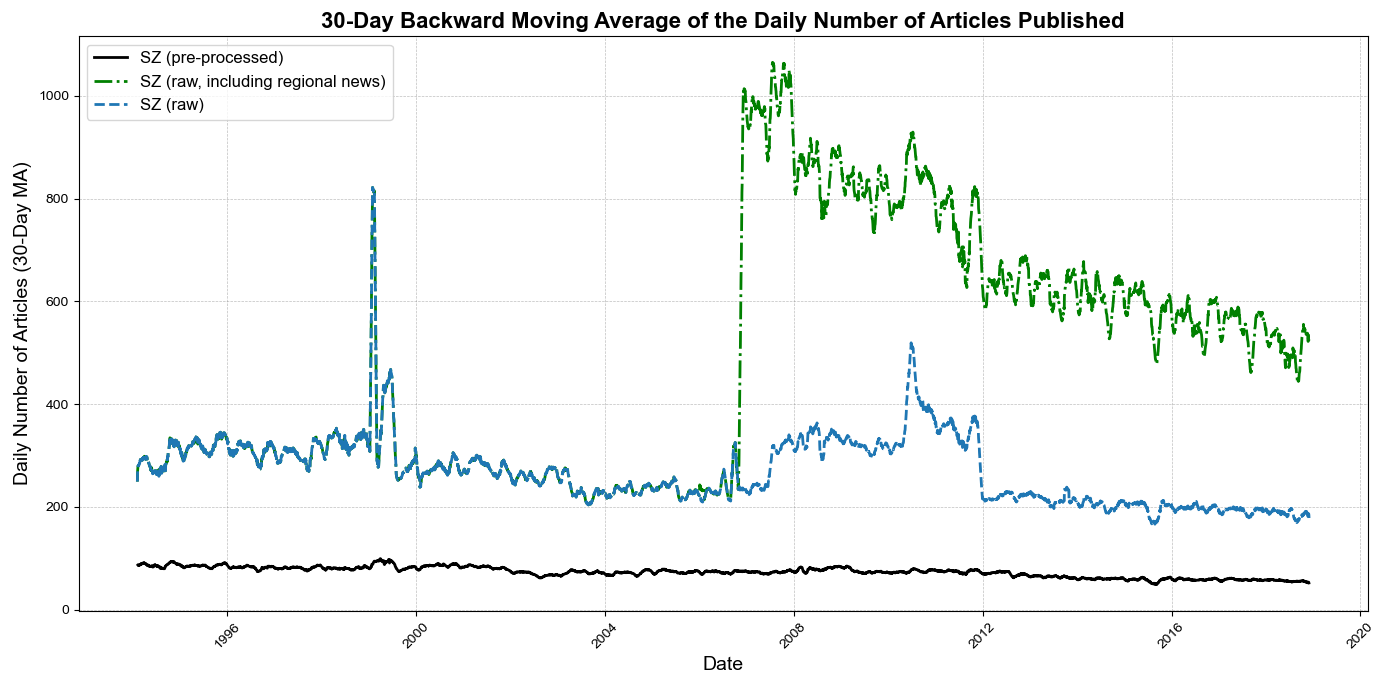

In [4]:
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(14, 7))

# Plot the 30-day moving average for sz and sz_raw
plt.plot(ma_sz.index, ma_sz, label='SZ (pre-processed)', linewidth=2, color='black')
plt.plot(ma_sz_raw_regional.index, ma_sz_raw_regional, label='SZ (raw, including regional news)', linewidth=2, linestyle='dashdot', color='green')
plt.plot(ma_sz_raw.index, ma_sz_raw, label='SZ (raw)', linewidth=2, linestyle='dashed')

# Enhance the plot with a title, axis labels, and legend
plt.title('30-Day Backward Moving Average of the Daily Number of Articles Published', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Number of Articles (30-Day MA)', fontsize=14)
plt.legend(fontsize=12, loc='upper left')

# Improve readability of the x-axis labels
plt.xticks(rotation=45)

# Set grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Tighten the layout to make full use of space
plt.tight_layout()

# Apply a sophisticated look with a predefined style
plt.style.use('seaborn-darkgrid')

# Save the plot
plt.savefig('sz_daily_publications.eps', format='eps')
plt.savefig('sz_daily_publications.png', format='png')

# Show the plot
plt.show()